In [114]:
import statsmodels.api as sm
import pandas as pd
import sqlite3

In [115]:
conn = sqlite3.connect('D:/Documents/GitHub/Statistical-Modelling-Project/notebooks/Montreal_POI_BIKE.db')

#Reading tables into pandas DataFrames
montreal_data = pd.read_sql_query("SELECT * FROM montreal_df;", conn)
foursquare_data = pd.read_sql_query("SELECT * FROM foursquare_data;", conn)
yelp_data = pd.read_sql_query("SELECT * FROM yelp_data;", conn)

# Close the database connection
conn.close()

In [116]:
#montreal_data.head()
#foursquare_data.head()
yelp_data.head()


,Name,Rating,Address,OriginalLatitude,OriginalLongitude,BusinessLatitude,BusinessLongitude
0,O'Thym,4.5,"1112 Boulevard de Maisonneuve E, Montreal, QC ...",45.516926,-73.564257,45.518377,-73.558126
1,LAON,4.8,"1657 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca...",45.516926,-73.564257,45.515288,-73.563474
2,Les Deux Gamins,4.2,"170 Rue Prince Arthur E, Montreal, QC H2X 1B7,...",45.516926,-73.564257,45.515513,-73.570983
3,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C...",45.516926,-73.564257,45.517123,-73.567689
4,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada",45.516926,-73.564257,45.523205,-73.561300


In [117]:
#renaming columns to match the other dataframes Foursquare and Yelp
montreal_data = montreal_data.rename(columns={
    'name': 'Bike_Station_Name',
    'latitude': 'Station_Latitude',
    'longitude': 'Station_Longitude',
    'free_bikes': 'Free_Bikes',
    'empty_slots': 'Empty_Slots'
    })
montreal_data.head()

,Bike_Station_Name,Station_Latitude,Station_Longitude,Free_Bikes,Empty_Slots
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3
1,Marché Maisonneuve,45.553219,-73.539782,14,8
2,Bibliothèque d'Ahuntsic (Lajeunesse / Fleury),45.553400,-73.662255,8,5
3,Cité des Arts du Cirque (Paul Boutet / des Reg...,45.559842,-73.615447,8,26
4,Omer-Lavallée / du Midway,45.545776,-73.562175,6,12


In [118]:
#Renaming columns to match each dataframe 
foursquare_data = foursquare_data.rename(columns={
    'Original_Latitude': 'Station_Latitude',
    'Original_Longitude': 'Station_Longitude',
    'Latitude': 'Venue_Latitude',
    'Longitude': 'Venue_Longitude',
    'TotalRatings': 'Total_Ratings'
})
foursquare_data.head()

,Station_Latitude,Station_Longitude,Venue_Name,Address,Venue_Latitude,Venue_Longitude,Categories,Rating,Total_Ratings
0,45.516926,-73.564257,Cadet,1431 Saint-Laurent Blvd (entre De Maisonneuve ...,45.510388,-73.564365,"['Restaurant', 'Wine Bar']",None,None
1,45.516926,-73.564257,L'Express,"3927 Saint-Denis Rue (entre Duluth & Roy), Mon...",45.520186,-73.574269,"['Bistro', 'French Restaurant']",None,None
2,45.516926,-73.564257,Le Club Espresso Bar,"3801 Saint-Denis Rue, Montréal QC H2W 2M4",45.519481,-73.572648,['Café'],None,None
3,45.516926,-73.564257,Bouillon Bilk,1595 Saint-Laurent Blvd (entre De Maisonneuve ...,45.511038,-73.565936,['Restaurant'],None,None
4,45.516926,-73.564257,Pourquoi Pas Espresso Bar,1447 Atateken Rue (entre De Maisonneuve & Ste-...,45.517964,-73.557776,"['Café', 'Coffee Shop', 'Restaurant']",None,None


In [119]:
#Performed the same renaming to match Foursquare
yelp_data = yelp_data.rename(columns={
    'OriginalLatitude': 'Station_Latitude',
    'OriginalLongitude': 'Station_Longitude',
    'BusinessLatitude': 'Venue_Latitude',
    'BusinessLongitude': 'Venue_Longitude',
    'Name': "Venue_Name"
})
yelp_data.head()

,Venue_Name,Rating,Address,Station_Latitude,Station_Longitude,Venue_Latitude,Venue_Longitude
0,O'Thym,4.5,"1112 Boulevard de Maisonneuve E, Montreal, QC ...",45.516926,-73.564257,45.518377,-73.558126
1,LAON,4.8,"1657 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca...",45.516926,-73.564257,45.515288,-73.563474
2,Les Deux Gamins,4.2,"170 Rue Prince Arthur E, Montreal, QC H2X 1B7,...",45.516926,-73.564257,45.515513,-73.570983
3,Sparta,4.7,"405B Rue Sherbrooke E, Montreal, QC H2L 1J9, C...",45.516926,-73.564257,45.517123,-73.567689
4,Poutineville,4.3,"1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada",45.516926,-73.564257,45.523205,-73.561300


In [120]:
#trying to extract the categories into something that can be used in model
#attempting to use the first index in list if it really is a list.

#foursquare_data['Categories'] = foursquare_data['Categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

#determining if there are any non null values in the 'Categories' column
#filtered_data = foursquare_data[foursquare_data['Categories'].notna()]
#filtered_data
#there were none. This is not a list datatype

In [121]:
for index, categories in enumerate(foursquare_data['Categories']):
    print(f"Row {index}: {type(categories)}")

#all values in column were string format not list

Row 0: <class 'str'>
Row 1: <class 'str'>
Row 2: <class 'str'>
Row 3: <class 'str'>
Row 4: <class 'str'>
Row 5: <class 'str'>
Row 6: <class 'str'>
Row 7: <class 'str'>
Row 8: <class 'str'>
Row 9: <class 'str'>
Row 10: <class 'str'>
Row 11: <class 'str'>
Row 12: <class 'str'>
Row 13: <class 'str'>
Row 14: <class 'str'>
Row 15: <class 'str'>
Row 16: <class 'str'>
Row 17: <class 'str'>
Row 18: <class 'str'>
Row 19: <class 'str'>
Row 20: <class 'str'>
Row 21: <class 'str'>
Row 22: <class 'str'>
Row 23: <class 'str'>
Row 24: <class 'str'>
Row 25: <class 'str'>
Row 26: <class 'str'>
Row 27: <class 'str'>
Row 28: <class 'str'>
Row 29: <class 'str'>
Row 30: <class 'str'>
Row 31: <class 'str'>
Row 32: <class 'str'>
Row 33: <class 'str'>
Row 34: <class 'str'>
Row 35: <class 'str'>
Row 36: <class 'str'>
Row 37: <class 'str'>
Row 38: <class 'str'>
Row 39: <class 'str'>
Row 40: <class 'str'>
Row 41: <class 'str'>
Row 42: <class 'str'>
Row 43: <class 'str'>
Row 44: <class 'str'>
Row 45: <class 'str'

In [122]:
#found a module that will convert it into an actual list

import ast  # Import ast module for literal_eval

# Function to convert string representation of list to actual list
def convert_to_list(categories_str):
    try:
        return ast.literal_eval(categories_str)
    except (SyntaxError, ValueError):
        return None  # Handle invalid strings gracefully

# Apply conversion function to 'Categories' column
foursquare_data['Categories'] = foursquare_data['Categories'].apply(convert_to_list)

In [123]:
#check that it is now a list
foursquare_data

,Station_Latitude,Station_Longitude,Venue_Name,Address,Venue_Latitude,Venue_Longitude,Categories,Rating,Total_Ratings
0,45.516926,-73.564257,Cadet,1431 Saint-Laurent Blvd (entre De Maisonneuve ...,45.510388,-73.564365,"[Restaurant, Wine Bar]",None,None
1,45.516926,-73.564257,L'Express,"3927 Saint-Denis Rue (entre Duluth & Roy), Mon...",45.520186,-73.574269,"[Bistro, French Restaurant]",None,None
2,45.516926,-73.564257,Le Club Espresso Bar,"3801 Saint-Denis Rue, Montréal QC H2W 2M4",45.519481,-73.572648,[Café],None,None
3,45.516926,-73.564257,Bouillon Bilk,1595 Saint-Laurent Blvd (entre De Maisonneuve ...,45.511038,-73.565936,[Restaurant],None,None
4,45.516926,-73.564257,Pourquoi Pas Espresso Bar,1447 Atateken Rue (entre De Maisonneuve & Ste-...,45.517964,-73.557776,"[Café, Coffee Shop, Restaurant]",None,None
...,...,...,...,...,...,...,...,...,...
8002,45.559887,-73.698220,Allo Pizza,"105 Cartier Blvd O, Laval QC H7N 2H6",45.560727,-73.690496,[Pizzeria],None,None
8003,45.559887,-73.698220,Restaurant le Cartier,"319 Cartier Blvd O (Ampère), Laval QC H7N 2J4",45.555011,-73.702614,[Steakhouse],None,None
8004,45.559887,-73.698220,Café Bistro Il Momento,"180 Blvd de la Concorde Ouest, Laval QC H7N 1H9",45.565933,-73.699552,"[Bistro, Café, Coffee Shop]",None,None
8005,45.559887,-73.698220,Rôtisseries Benny & Au Coq,"54 Cartier Blvd O, Laval QC",45.559354,-73.689475,[Fried Chicken Joint],None,None


In [124]:
#trying to see if categories is now a list
categories_dtype = foursquare_data['Categories'].dtype
print(f"The data type of 'Categories' column is: {categories_dtype}")

The data type of 'Categories' column is: object


In [125]:
#check the first element
first_category_type = type(foursquare_data.loc[0, 'Categories'])
first_category_type

list

In [126]:
# Add a new column to count number of items in each list
foursquare_data['NumCategories'] = foursquare_data['Categories'].apply(lambda x: len(x))

# Display the DataFrame with the new column
print(foursquare_data[['Venue_Name', 'Categories', 'NumCategories']])

                        Venue_Name                       Categories  \
0                            Cadet           [Restaurant, Wine Bar]   
1                        L'Express      [Bistro, French Restaurant]   
2             Le Club Espresso Bar                           [Café]   
3                    Bouillon Bilk                     [Restaurant]   
4        Pourquoi Pas Espresso Bar  [Café, Coffee Shop, Restaurant]   
...                            ...                              ...   
8002                    Allo Pizza                       [Pizzeria]   
8003         Restaurant le Cartier                     [Steakhouse]   
8004        Café Bistro Il Momento      [Bistro, Café, Coffee Shop]   
8005    Rôtisseries Benny & Au Coq            [Fried Chicken Joint]   
8006  Siembra Café & Smoothies Bar                           [Café]   

      NumCategories  
0                 2  
1                 2  
2                 1  
3                 1  
4                 3  
...            

In [127]:
# Use value_counts() to count occurrences of each NumCategories value
category_counts = foursquare_data['NumCategories'].value_counts().reset_index()
category_counts.columns = ['NumCategories', 'Count']

# Display the grouped counts
print(category_counts)

   NumCategories  Count
0              1   3209
1              3   2411
2              2   2380
3              4      4
4              0      2
5              6      1


In [128]:
# Check for null values in 'Categories' column of foursquare_data
null_categories = foursquare_data[foursquare_data['Categories'].isnull()]

# Display rows where 'Categories' is null
null_categories

,Station_Latitude,Station_Longitude,Venue_Name,Address,Venue_Latitude,Venue_Longitude,Categories,Rating,Total_Ratings,NumCategories


In [130]:
# Merge montreal_data with foursquare_data
merged_foursquare = pd.merge(montreal_data, foursquare_data,
                             on=['Station_Latitude', 'Station_Longitude'],
                             how='inner')

In [133]:
# Merge montreal_data with yelp_data
merged_yelp = pd.merge(montreal_data, yelp_data,
                       on=['Station_Latitude', 'Station_Longitude'],
                       how='inner')

In [136]:
# Combine merged_foursquare and merged_yelp
merged_venues = pd.concat([merged_foursquare, merged_yelp], ignore_index=True)

C:\Users\HAL-9000\AppData\Local\Temp\ipykernel_8256\2517381681.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_venues = pd.concat([merged_foursquare, merged_yelp], ignore_index=True)


In [137]:
merged_venues.head()

,Bike_Station_Name,Station_Latitude,Station_Longitude,Free_Bikes,Empty_Slots,Venue_Name,Address,Venue_Latitude,Venue_Longitude,Categories,Rating,Total_Ratings,NumCategories
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Cadet,1431 Saint-Laurent Blvd (entre De Maisonneuve ...,45.510388,-73.564365,"[Restaurant, Wine Bar]",NaN,None,2.0
1,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,L'Express,"3927 Saint-Denis Rue (entre Duluth & Roy), Mon...",45.520186,-73.574269,"[Bistro, French Restaurant]",NaN,None,2.0
2,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Le Club Espresso Bar,"3801 Saint-Denis Rue, Montréal QC H2W 2M4",45.519481,-73.572648,[Café],NaN,None,1.0
3,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Bouillon Bilk,1595 Saint-Laurent Blvd (entre De Maisonneuve ...,45.511038,-73.565936,[Restaurant],NaN,None,1.0
4,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,9,3,Pourquoi Pas Espresso Bar,1447 Atateken Rue (entre De Maisonneuve & Ste-...,45.517964,-73.557776,"[Café, Coffee Shop, Restaurant]",NaN,None,3.0


In [141]:
# Group by venue details and count the number of bike stations
venue_groups = merged_venues.groupby(['Venue_Name', 'Address', 'Venue_Latitude', 'Venue_Longitude']).size().reset_index(name='Num_Bike_Stations')

# Sort by the number of bike stations
venue_groups_sorted = venue_groups.sort_values(by='Num_Bike_Stations', ascending=False)

# Display the grouped and counted dataframe
venue_groups_sorted.head()

,Venue_Name,Address,Venue_Latitude,Venue_Longitude,Num_Bike_Stations
3385,Time Out Market Montréal,"705 Sainte-Catherine Rue O, Montréal QC H3B 4G5",45.502801,-73.571533,71
346,Bouillon Bilk,1595 Saint-Laurent Blvd (entre De Maisonneuve ...,45.511038,-73.565936,69
1470,La Finca café & bureau,"1067 Rue de Bleury (De la Gauchetière), Montré...",45.504677,-73.563069,65
476,Cadet,1431 Saint-Laurent Blvd (entre De Maisonneuve ...,45.510388,-73.564365,64
1639,Le Moineau Masqué,"912 Marie-Anne Rue E (coin St-André), Montréal...",45.525508,-73.577976,60


In [144]:
# Group by venue details and aggregate metrics
venue_groups = merged_venues.groupby(['Venue_Name', 'Address', 'Venue_Latitude', 'Venue_Longitude']).agg({
    'Station_Latitude': 'size',  # Counting number of bike stations
    'Rating': 'mean',            # Finding Mean For Rating
    'Free_Bikes': 'sum',         # Summing Free Bikes
    'Empty_Slots': 'sum'         # Summing Empty Slots
}).reset_index()

# Rename the column for number of bike stations
venue_groups.rename(columns={'Station_Latitude': 'Num_Bike_Stations'}, inplace=True)

# Sort by the number of bike stations
venue_groups_sorted = venue_groups.sort_values(by='Num_Bike_Stations', ascending=False)

# Display the grouped and aggregated dataframe
venue_groups_sorted.head()

,Venue_Name,Address,Venue_Latitude,Venue_Longitude,Num_Bike_Stations,Rating,Free_Bikes,Empty_Slots
3385,Time Out Market Montréal,"705 Sainte-Catherine Rue O, Montréal QC H3B 4G5",45.502801,-73.571533,71,NaN,498,1511
346,Bouillon Bilk,1595 Saint-Laurent Blvd (entre De Maisonneuve ...,45.511038,-73.565936,69,NaN,704,1087
1470,La Finca café & bureau,"1067 Rue de Bleury (De la Gauchetière), Montré...",45.504677,-73.563069,65,NaN,544,1287
476,Cadet,1431 Saint-Laurent Blvd (entre De Maisonneuve ...,45.510388,-73.564365,64,NaN,611,1042
1639,Le Moineau Masqué,"912 Marie-Anne Rue E (coin St-André), Montréal...",45.525508,-73.577976,60,NaN,668,665


In [145]:
# Check count of null values in each column
null_counts = venue_groups_sorted.isnull().sum()

print(null_counts)

Venue_Name              0
Address                 0
Venue_Latitude          0
Venue_Longitude         0
Num_Bike_Stations       0
Rating               1394
Free_Bikes              0
Empty_Slots             0
dtype: int64


In [146]:
# Remove rows where Rating is null
venue_groups_sorted_clean = venue_groups_sorted.dropna(subset=['Rating'])

# Check the shape of the cleaned dataframe
print("Shape after removing null ratings:", venue_groups_sorted_clean.shape)

# Display the first few rows to verify
venue_groups_sorted_clean.head()

Shape after removing null ratings: (2180, 8)


,Venue_Name,Address,Venue_Latitude,Venue_Longitude,Num_Bike_Stations,Rating,Free_Bikes,Empty_Slots
756,Chifa,"1080 Rue de Bleury, Montreal, QC H2Z 1N2, Canada",45.504410,-73.563700,52,4.5,494,1140
475,Cadet,"1431 Boulevard Saint-Laurent, Montreal, QC H2X...",45.510300,-73.564418,46,4.5,548,774
1742,Les Deux Gamins,"170 Rue Prince Arthur E, Montreal, QC H2X 1B7,...",45.515513,-73.570983,45,4.2,510,593
2081,NYK'S,"1250 Rue de Bleury, Montreal, QC H3B 2W4, Canada",45.506032,-73.566685,44,4.1,446,875
2040,Monarque,"406 Rue Saint-Jacques, Montreal, QC H2Y 1S1, C...",45.501580,-73.559620,43,4.6,394,929


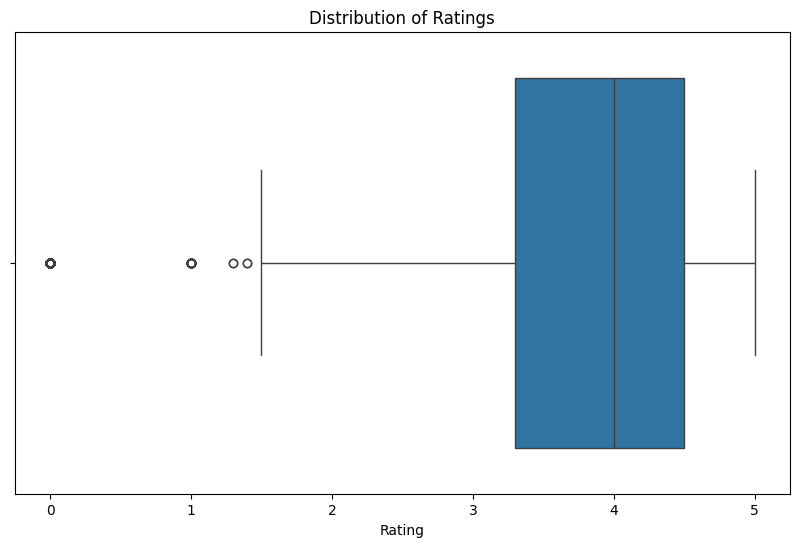

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x=venue_groups_sorted_clean['Rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()


count    1868.000000
mean        4.067398
std         0.673742
min         1.500000
25%         3.800000
50%         4.100000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


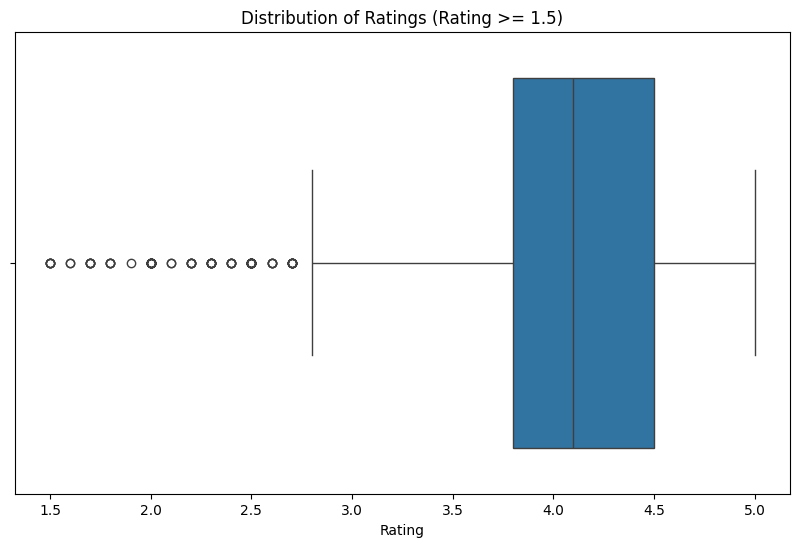

In [149]:
# Filter ratings below 1.5
venue_groups_sorted_clean = venue_groups_sorted_clean[venue_groups_sorted_clean['Rating'] >= 1.5]

# Confirm the removal
print(venue_groups_sorted_clean['Rating'].describe())

# Plot the updated box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=venue_groups_sorted_clean['Rating'])
plt.title('Distribution of Ratings (Rating >= 1.5)')
plt.xlabel('Rating')
plt.show()

In [151]:
import pandas as pd
import statsmodels.api as sm

# Assuming venue_groups_sorted_clean is your cleaned dataframe

# Selecting relevant columns for the regression model
data = venue_groups_sorted_clean[['Rating', 'Free_Bikes', 'Empty_Slots']]

# Drop rows with any missing values
data = data.dropna()

# Define dependent variable (y) and independent variables (X)
y = data['Rating']
X = data[['Free_Bikes', 'Empty_Slots']]

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Create a linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     44.71
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.08e-19
Time:                        21:32:53   Log-Likelihood:                -1868.6
No. Observations:                1868   AIC:                             3743.
Df Residuals:                    1865   BIC:                             3760.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9408      0.020    193.477      

In [152]:
import pandas as pd
import statsmodels.api as sm

# Assuming venue_groups_sorted_clean is your dataframe

# Selecting relevant columns for the regression model
data = venue_groups_sorted_clean[['Rating', 'Num_Bike_Stations', 'Free_Bikes', 'Empty_Slots']]

# Drop rows with any missing values
data = data.dropna()

# Define dependent variable (y) and independent variables (X)
y = data['Rating']
X = data[['Num_Bike_Stations', 'Free_Bikes', 'Empty_Slots']]

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Create a linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     36.02
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.26e-22
Time:                        21:44:15   Log-Likelihood:                -1859.8
No. Observations:                1868   AIC:                             3728.
Df Residuals:                    1864   BIC:                             3750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9087      0.02

In [153]:
file_path = r'D:/Documents/GitHub/Statistical-Modelling-Project/filtered_merged_data.csv'

# Save the DataFrame to CSV
venue_groups_sorted_clean.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to D:/Documents/GitHub/Statistical-Modelling-Project/filtered_merged_data.csv


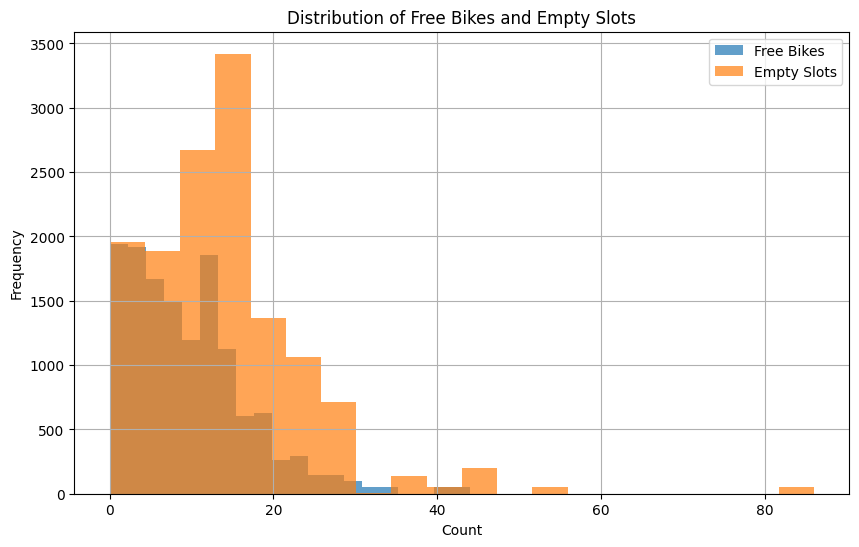

In [41]:
import matplotlib.pyplot as plt

# Histogram for Free Bikes and Empty Slots
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Free_Bikes'], bins=20, alpha=0.7, label='Free Bikes')
plt.hist(merged_df['Empty_Slots'], bins=20, alpha=0.7, label='Empty Slots')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Free Bikes and Empty Slots')
plt.legend()
plt.grid(True)
plt.show()


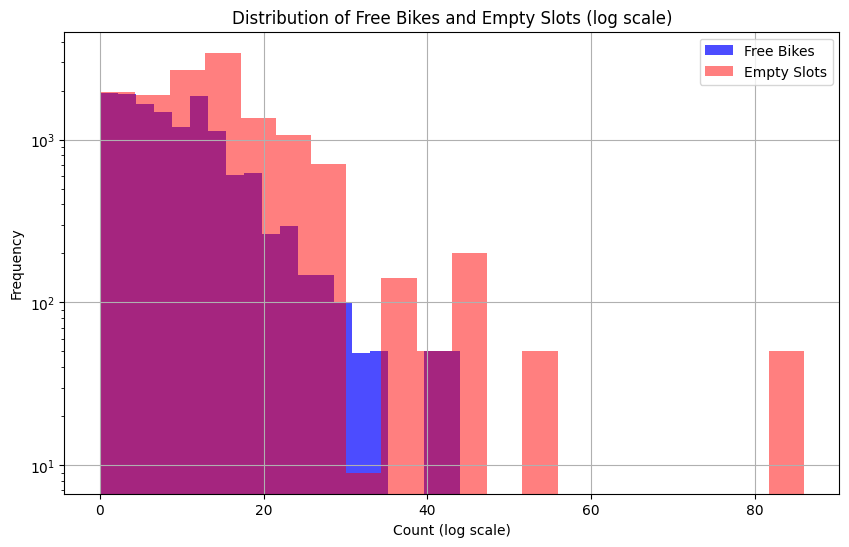

In [42]:
#tried to use log scale to alter the view of data
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Free_Bikes'], bins=20, alpha=0.7, color='blue', label='Free Bikes', log=True)
plt.hist(merged_df['Empty_Slots'], bins=20, alpha=0.5, color='red', label='Empty Slots', log=True)
plt.xlabel('Count (log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Free Bikes and Empty Slots (log scale)')
plt.legend()
plt.grid(True)
plt.show()

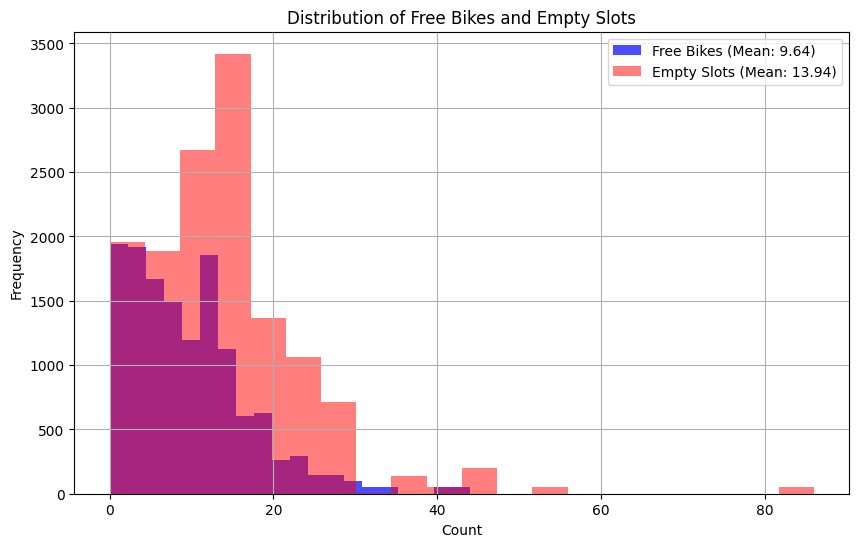

In [46]:
#searching for variables that may show significance
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Free_Bikes'], bins=20, alpha=0.7, color='blue', label=f'Free Bikes (Mean: {merged_df["Free_Bikes"].mean():.2f})')
plt.hist(merged_df['Empty_Slots'], bins=20, alpha=0.5, color='red', label=f'Empty Slots (Mean: {merged_df["Empty_Slots"].mean():.2f})')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Free Bikes and Empty Slots')
plt.legend()
plt.grid(True)
plt.show()

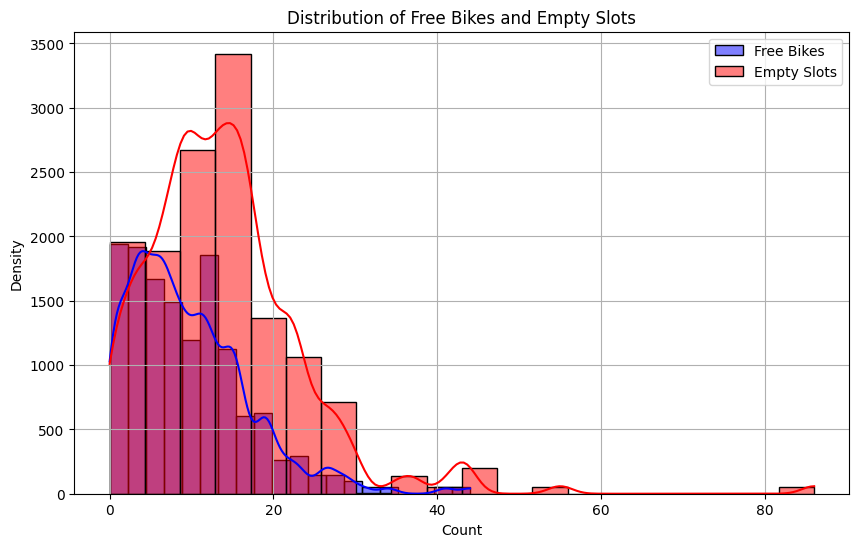

In [48]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Free_Bikes'], bins=20, kde=True, color='blue', label='Free Bikes')
sns.histplot(merged_df['Empty_Slots'], bins=20, kde=True, color='red', label='Empty Slots')
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Distribution of Free Bikes and Empty Slots')
plt.legend()
plt.grid(True)
plt.show()

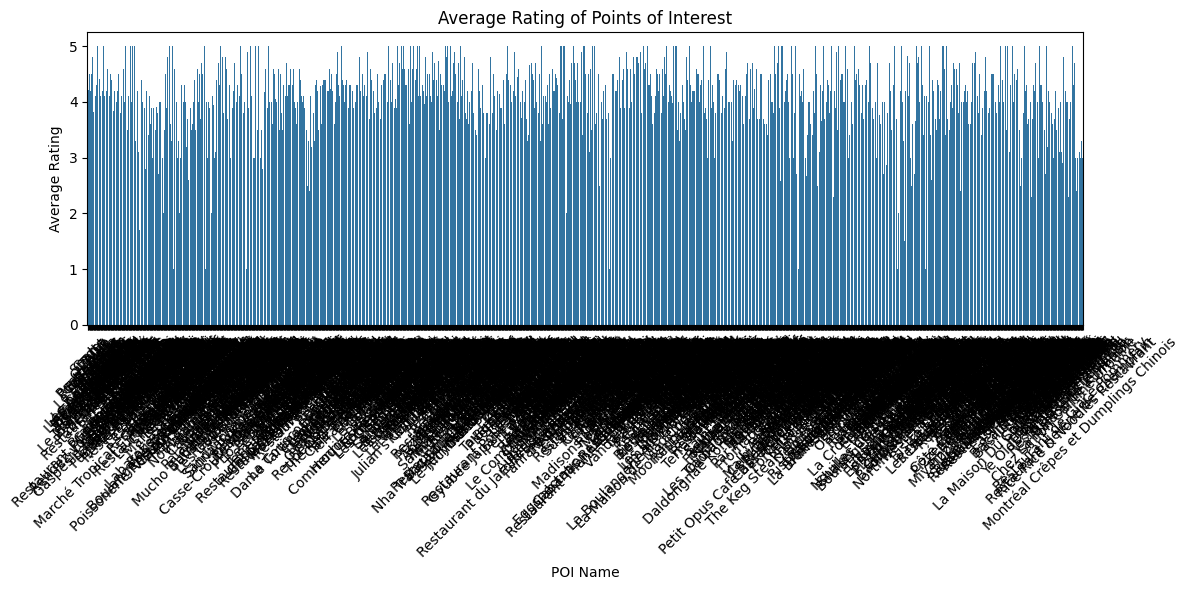

In [49]:
import seaborn as sns
# Bar plot of Average Rating by POI Name
#This was clearly difficult to interpret.
plt.figure(figsize=(12, 6))
sns.barplot(x='POI Name', y='Rating', data=merged_df, errorbar=None)
plt.xticks(rotation=45)
plt.xlabel('POI Name')
plt.ylabel('Average Rating')
plt.title('Average Rating of Points of Interest')
plt.tight_layout()
plt.show()

C:\Users\HAL-9000\AppData\Local\Temp\ipykernel_20948\2858068304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', data=merged_df, palette='viridis')


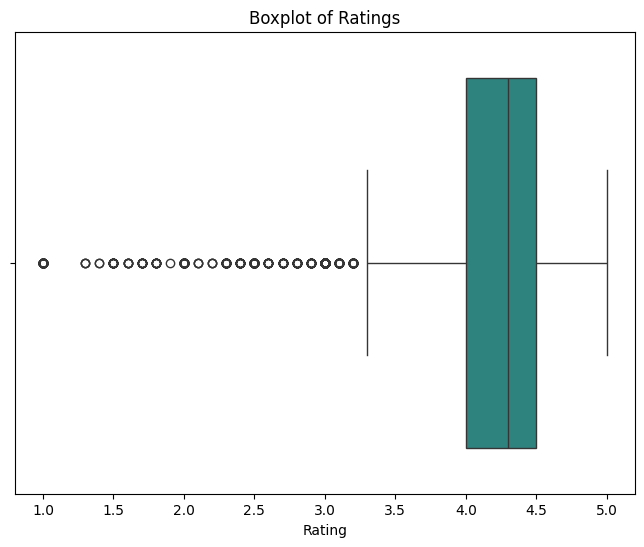

In [50]:
#looking for potential outliers in ratings 
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=merged_df, palette='viridis')
plt.xlabel('Rating')
plt.title('Boxplot of Ratings')
plt.show()

C:\Users\HAL-9000\AppData\Local\Temp\ipykernel_20948\3367038671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', data=filtered_df, palette='viridis')


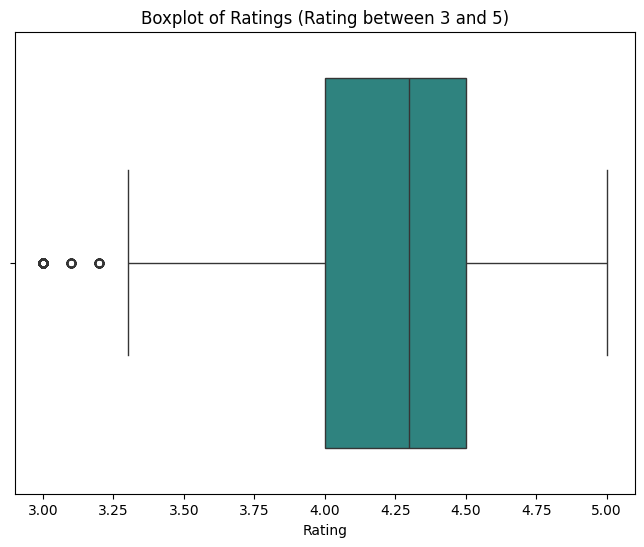

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter ratings between 3 and 5
filtered_df = merged_df[(merged_df['Rating'] >= 3) & (merged_df['Rating'] <= 5)]

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=filtered_df, palette='viridis')
plt.xlabel('Rating')
plt.title('Boxplot of Ratings (Rating between 3 and 5)')
plt.show()

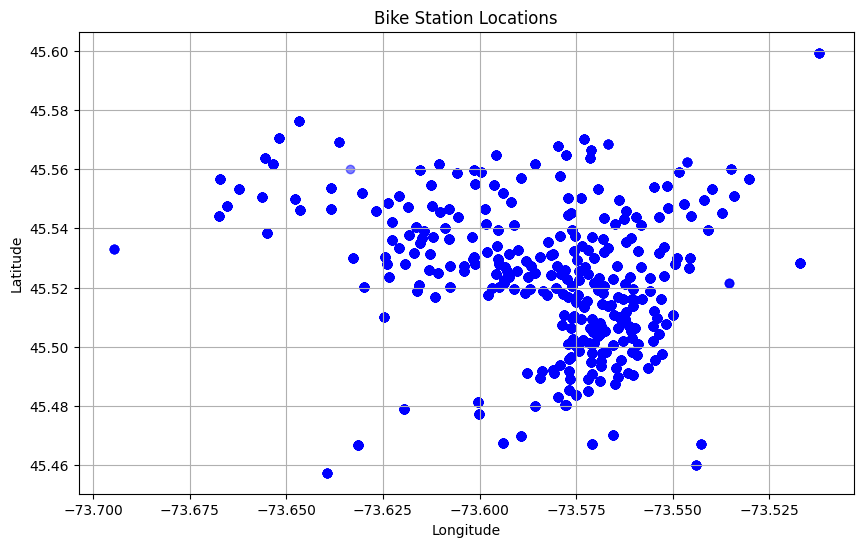

In [51]:
import matplotlib.pyplot as plt

# Scatter plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Longitude'], merged_df['Latitude'], c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Station Locations')
plt.grid(True)
plt.show()

In [52]:
numeric_columns = ['Free_Bikes', 'Latitude', 'Longitude', 'POI Count']

# Calculate correlation matrix
corr_matrix = merged_df[numeric_columns].corr()



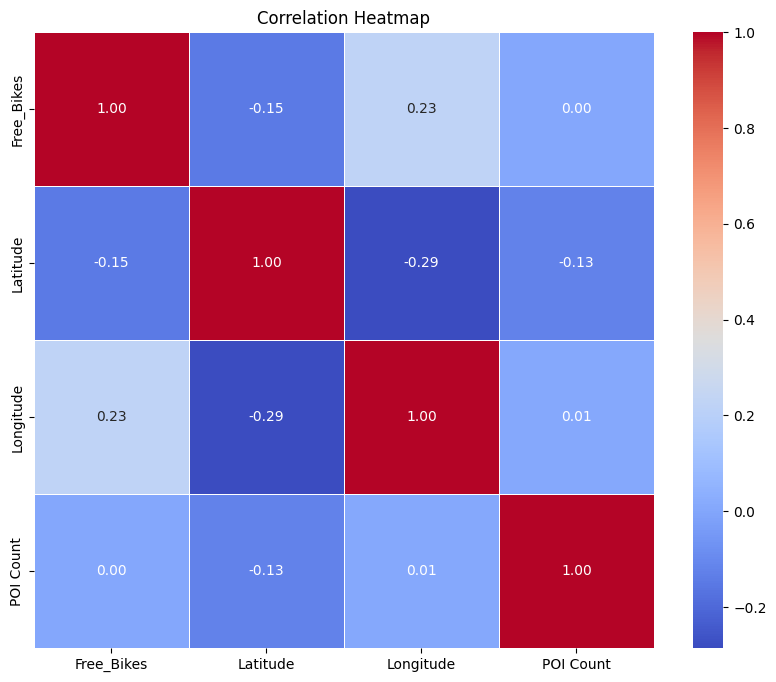

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
#searching for significance and correlation between columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = merged_df[['Free_Bikes', 'Empty_Slots', 'Rating', 'Latitude', 'Longitude']]

#Convert numerical columns to float
data = data.astype({'Free_Bikes': float, 'Empty_Slots': float, 'Rating': float})


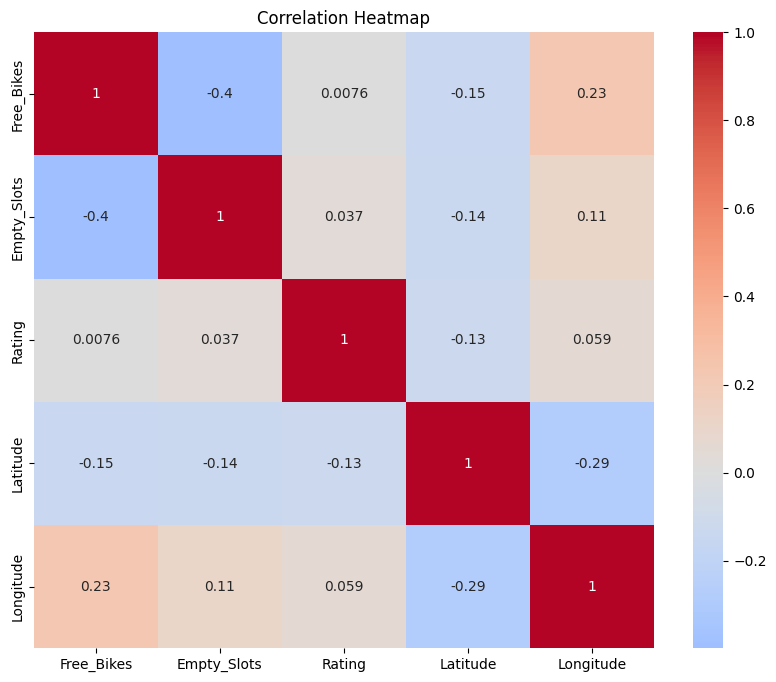

In [55]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()